In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_dir=r'D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\Pneumonia_or_normal\xray_dataset_covid19\train'


In [3]:
train_pneumonia_dir=r'D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\Pneumonia_or_normal\xray_dataset_covid19\train\PNEUMONIA'
train_normal_dir=r'D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\Pneumonia_or_normal\xray_dataset_covid19\train\NORMAL'

In [4]:
train_pneumonia_names=os.listdir(train_pneumonia_dir)
train_normal_names=os.listdir(train_normal_dir)

In [5]:
train_pneumonia_names[4]

'1-s2.0-S1684118220300682-main.pdf-002-a1.png'

In [6]:
ind=0
nrows,ncols=4,4

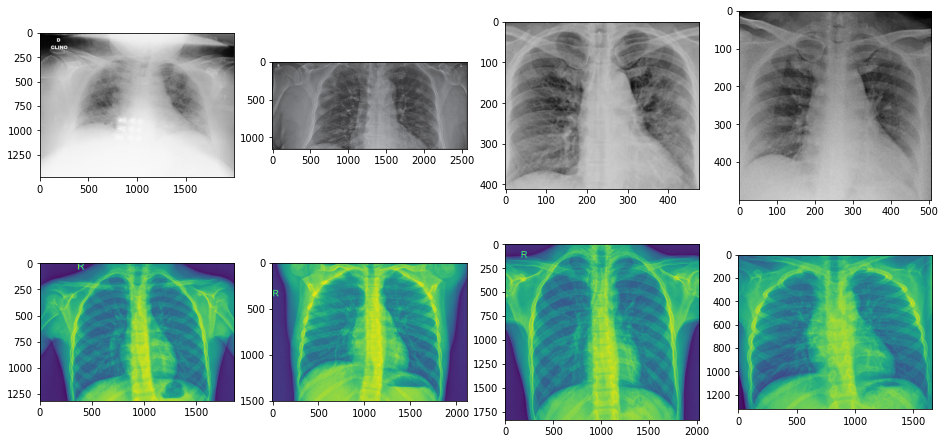

In [7]:
#Pneumonia
ind+=4
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pneumonia_pic=[os.path.join(train_pneumonia_dir,name)
                for name in train_pneumonia_names[ind-4:ind]]
normal_pic=[os.path.join(train_normal_dir,name)
                for name in train_normal_names[ind-4:ind]]
    
    
for i,img_path in enumerate(pneumonia_pic+normal_pic):
    sp=plt.subplot(nrows,ncols,i+1)
    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [8]:
train_datagen=ImageDataGenerator(rescale=1.0/255.)

In [9]:
train_data=train_datagen.flow_from_directory(train_data_dir,target_size=(300,300),batch_size=8,class_mode='binary')

Found 148 images belonging to 2 classes.


In [18]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
    
])

In [19]:
from tensorflow.keras.optimizers import RMSprop

In [20]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(train_data,steps_per_epoch=train_data.samples//10,epochs=10,verbose=1)

Epoch 1/10
14/14 [==============================] - 16s 926ms/step - loss: 0.8440 - accuracy: 0.4444
Epoch 2/10
14/14 [==============================] - 12s 837ms/step - loss: 0.8068 - accuracy: 0.6111
Epoch 3/10
14/14 [==============================] - 13s 895ms/step - loss: 0.7158 - accuracy: 0.7037
Epoch 4/10
14/14 [==============================] - 11s 772ms/step - loss: 0.4273 - accuracy: 0.8241
Epoch 5/10
14/14 [==============================] - 12s 854ms/step - loss: 0.9669 - accuracy: 0.7778
Epoch 6/10
14/14 [==============================] - 14s 962ms/step - loss: 0.3249 - accuracy: 0.8571
Epoch 7/10
14/14 [==============================] - 12s 819ms/step - loss: 0.4553 - accuracy: 0.8426
Epoch 8/10
14/14 [==============================] - 11s 746ms/step - loss: 0.2385 - accuracy: 0.8796
Epoch 9/10
14/14 [==============================] - 12s 784ms/step - loss: 0.3357 - accuracy: 0.8796
Epoch 10/10
14/14 [==============================] - 11s 825ms/step - loss: 0.2225 - accura

In [22]:
# #for 3 cov layers using RMSprop
# Epoch 10/10
# 14/14 [==============================] - 11s 743ms/step - loss: 2.8890 - accuracy: 0.9074

#for 4 conv layers
# Epoch 10/10
# 14/14 [==============================] - 8s 553ms/step - loss: 0.1915 - accuracy: 0.9074
        
    
# using Adadelta 4 conv
# Epoch 10/10
# 14/14 [==============================] - 7s 509ms/step - loss: 0.6782 - accuracy: 0.8056

#Adam 4 conv
# Epoch 10/10
# 14/14 [==============================] - 8s 531ms/step - loss: 0.0716 - accuracy: 0.9732

In [23]:
model.evaluate(train_data)

19/19 [==============================] - 8s 391ms/step - loss: 0.1306 - accuracy: 0.9662


[0.1305834949016571, 0.9662162065505981]

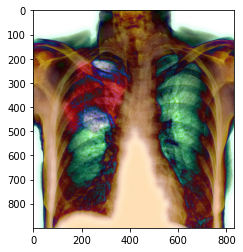

[0.9818579]
6-pneumonia-x-ray-du-cane-medical-imaging-ltd.jpg is Pneumonia Patient


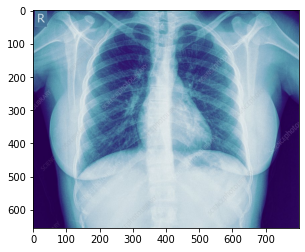

[0.24970764]
C0197307-Normal_healthy_Chest_x-ray.jpg is Normal 


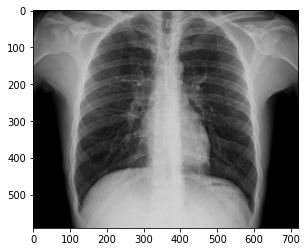

[0.05614775]
Normal-chest-X-ray-taken-seven-days-after-admission.ppm is Normal 


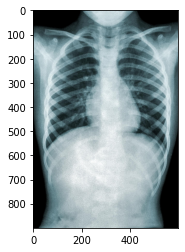

[0.80932605]
pneumonia-chest-xray-daniel-hagerman.jpg is Pneumonia Patient


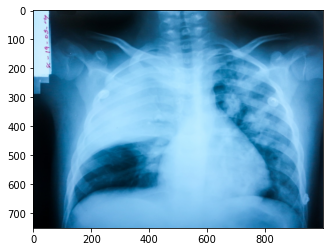

[0.01363865]
pneumoniaxrayg486839770_1311570.jpg is Normal 


In [24]:
from keras.preprocessing import image
import numpy as np

test_data_dir=r'D:\AA-SANYUKTAA\Coursera-Tensorflow\datasets\Pneumonia_or_normal\pneumaonia_test_imgs'

test_img_names=os.listdir(test_data_dir)
for i in test_img_names:
    path=os.path.join(test_data_dir,i)
    imag=mpimg.imread(path)
    plt.imshow(imag)
    plt.show()
    
    img=image.load_img(path,target_size=(300,300))
    x=image.img_to_array(img)
    x/=255
    x=np.expand_dims(x,axis=0)
    
    images=np.vstack([x])
    accuracy_of_pred=model.predict(images)
    print(accuracy_of_pred[0])
    if accuracy_of_pred[0]>0.5:
        print(f'{i} is Pneumonia Patient')
    else:
        print(f"{i} is Normal ")
    

Text(0.5, 1.0, 'Training accuracy and loss')

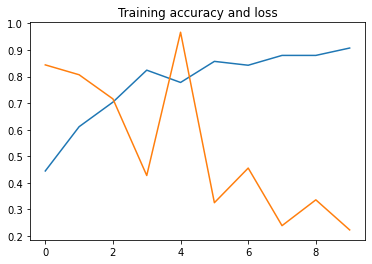

In [29]:
acc      = history.history[     'accuracy' ]
#val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc )
plt.plot  ( epochs,     loss )

plt.title ('Training accuracy and loss'   )